<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">

<center><h1 style="font-size:2em;color:RED">Cáncer de mama </h1></center>

# Proyecto de Machine Learning

	
En la siguiente lección se realizará un proyecto de ejemplo de principio a fin, pretendiendo ser un científico de datos recientemente contratado en una empresa de bienes raíces. Estos son los pasos principales que deberá seguir:

1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)


## 1. Mira el panorama general y entienda el problema.

<center><h1 style="font-size:2em;color:#2467C0">Caso de estudio:  cáncer de mama </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/OIP.jpg" align="middle" style="width:350px;"/></td>
<td>
    
El cáncer de mama es una enfermedad en la cual las células de la mama se multiplican sin control. Existen distintos tipos de cáncer de mama. El tipo de cáncer de mama depende de qué células de la mama se vuelven cancerosas.
    
*De cada diez mujeres que se encuentran en la autoexploración o en la exploración clínica una tumoración ocho son benignas, solo el médico especializado apoyado con estudios específicos puede diagnosticarlo.

https://www.gob.mx/salud/acciones-y-programas/cancer-de-mama-informacion-general
    
<br>
</td>
</tr>
</table>

**Problema**

A través del análisis de los datos se identificará si el cancer es benigno o maligno con la finalidad de ayudar al profesional de la salud.



## 2.  Obtenga los datos

Este conjunto de datos contiene casos de un estudio realizado en los Hospitales de la Universidad de Wisconsin, Madison, sobre pacientes que se habían sometido a cirugía por cáncer de mama. La tarea es determinar si el tumor detectado es benigno (0) o maligno (1).


El conjunto de datos cuenta con 10 atributos y 699
registros así:

* @relation id
* @attribute ClumpThickness integer [1, 10]
* @attribute CellSize integer [1, 10]
* @attribute CellShape integer [1, 10]
* @attribute MarginalAdhesion integer [1, 10]
* @attribute EpithelialSize integer [1, 10]
* @attribute BareNuclei integer [1, 10]
* @attribute BlandChromatin integer [1, 10]
* @attribute NormalNucleoli integer [1, 10]
* @attribute Mitoses integer [1, 10]
* @attribute Class {2,4}


Datos: **datos/heart_disease.csv**

In [1]:
# Módulos importantes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# Cargamos el archivo 'datos/heart_disease.csv' en un dataframe
df = pd.read_csv('datos/wisconsin_data.csv')

## 3. Descubra y visualice los datos para obtener información.

In [7]:
# Mostrar los primeras filas
df.head()

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
0,1,5,1,1,1,2,1.0,3,1,1,0
1,2,5,4,4,5,7,10.0,3,2,1,0
2,3,3,1,1,1,2,2.0,3,1,1,0
3,4,6,8,8,1,3,4.0,3,7,1,0
4,5,4,1,1,3,2,1.0,3,1,1,0


In [8]:
# Encontrar los principales valores estadísticos 
df.describe()

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,667.000000,699.000000,699.000000,699.000000,699.000000
mean,350.000000,4.417740,3.134478,3.207439,2.806867,3.216023,3.536732,3.437768,2.866953,1.589413,0.344778
std,201.928205,2.815741,3.051459,2.971913,2.855379,2.214300,3.683795,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,175.500000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,350.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,524.500000,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,1.000000
max,699.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [11]:
# Mostrar las columnas
print(df.columns.values)

['patientId' 'clumpThickness' 'cellSize' 'CellShape' 'marginalAdhesion'
 'epithelialSize' 'bareNuclei' 'blandChromatin' 'normalNucleoli' 'mitoses'
 'label']


In [12]:
# Mostrar el número de filas y columnas
df.shape

(699, 11)

In [14]:
#Quitar la columna patiendId
df = df.drop('patientId', axis=1)

,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,2,1.0,2,1,1,0
695,2,1,1,1,2,1.0,3,1,1,0
696,5,10,10,10,4,10.0,5,6,3,1
697,1,1,1,3,2,1.0,1,1,1,0


In [16]:
#De manera general checar si hay elementos 'NaN'
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [18]:
#Quitar filas con elementos faltantes (
df = df.dropna(axis=0)

In [19]:
# Mostrar el número de filas y columnas sin NaN
df.shape

(667, 11)

In [20]:
# Mostrar el tipo de variables
df.dtypes

patientId             int64
clumpThickness        int64
cellSize              int64
CellShape             int64
marginalAdhesion      int64
epithelialSize        int64
bareNuclei          float64
blandChromatin        int64
normalNucleoli        int64
mitoses               int64
label                 int64
dtype: object

<Axes: >

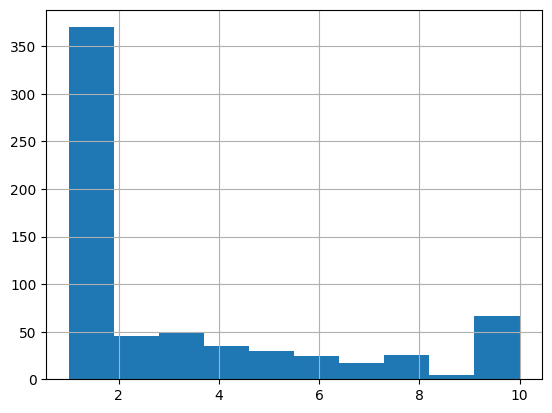

In [21]:
# Hacer un histograma de cellSize
df['cellSize'].hist()

array([[<Axes: title={'center': 'patientId'}>,
        <Axes: title={'center': 'clumpThickness'}>,
        <Axes: title={'center': 'cellSize'}>],
       [<Axes: title={'center': 'CellShape'}>,
        <Axes: title={'center': 'marginalAdhesion'}>,
        <Axes: title={'center': 'epithelialSize'}>],
       [<Axes: title={'center': 'bareNuclei'}>,
        <Axes: title={'center': 'blandChromatin'}>,
        <Axes: title={'center': 'normalNucleoli'}>],
       [<Axes: title={'center': 'mitoses'}>,
        <Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

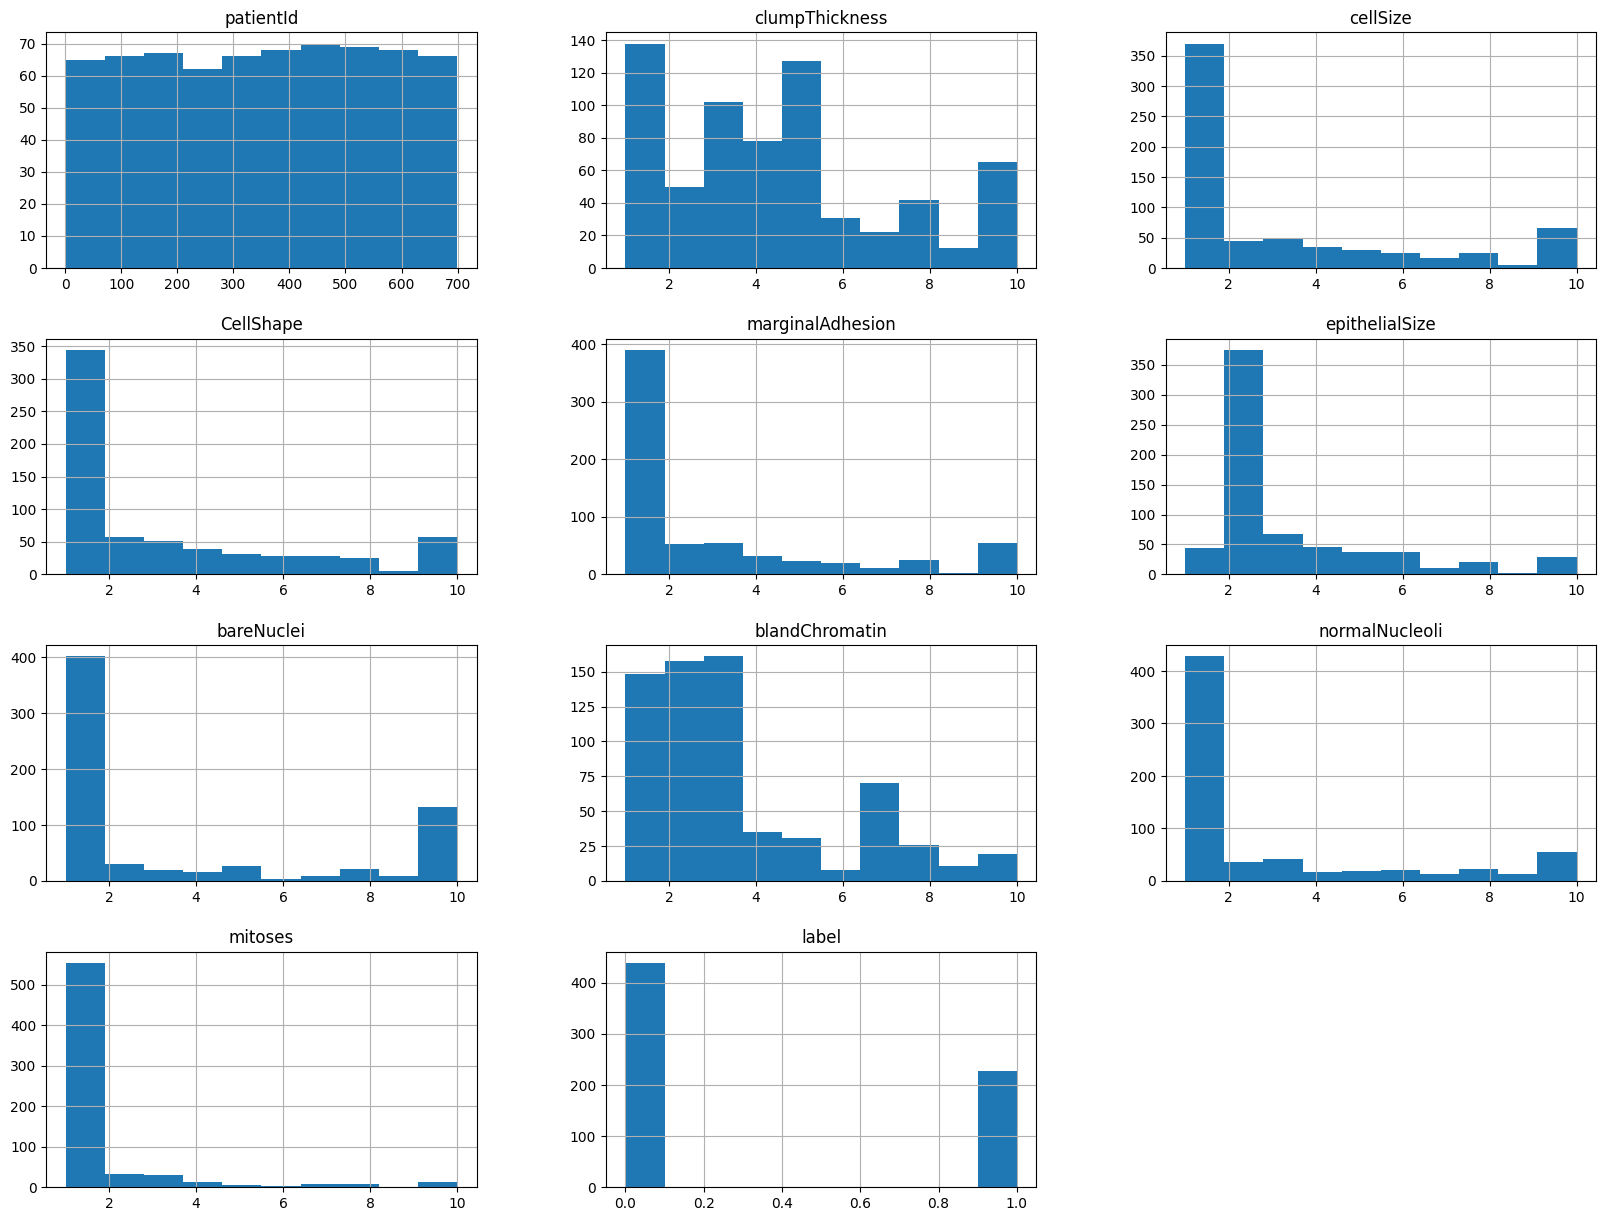

In [22]:
# Hacer un histograma de todas las variables numericas
df.hist(figsize=(20,15))

## 4.  Prepare los datos para los algoritmos de Machine Learning.

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">

División general de los datos
* **X**: Datos sin el diagnostico es decir sin la columna "label"
* **y**: Datos con el diagnostico es decir con la columna "label"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [2]:
# Crear X (Quitar la columna o campo de "label")


In [3]:
# Crear y (Valor de de la columna "label")


In [58]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split



In [4]:
# Revise  el tamaño de cada muestra


## 5 .  Seleccione un modelo y realice el entrenamiento (train).


<img  align="middle" style="width:750px;" src="figuras/imagesTree.jpg">



###  Árbol de decisión

In [26]:
## Módulos del Modelo: Arboles de decision 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
# modelo DecisionTreeClassifier
X = df.drop(columns='label')
X.head(2)

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses
0,1,5,1,1,1,2,1.0,3,1,1
1,2,5,4,4,5,7,10.0,3,2,1


In [25]:
# Ajuste del modelo
y = df['label']

In [31]:
# Dividir los datos para entrenamiento y pureba
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
# Imprime 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(500, 10)
(167, 10)
(500,)
(167,)


In [ ]:
# Predicción

In [7]:
# Prueba en y_test


In [8]:
# Comparación


In [9]:
# Score


##   Afina(fine tune) el modelo.


In [10]:
# Ajuste de los parametros max_depth y min_samples_leaf


### RandomForestClassifier

## Seleccione un modelo y realice el entrenamiento (train).


In [33]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [34]:
# Modelo
model_DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [35]:
# Ajuste del modelado
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [38]:
# Predicción
y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0]


In [39]:
# Comparación
print(y_test.values)

[0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0]


In [42]:
print(np.equal(y_pred, y_test.values))

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [40]:
# Score
np.equal(y_pred, y_test.values).sum() / y_test.size

0.9700598802395209

In [43]:
model_DT.score(X_test, y_test)

0.9700598802395209

##  Afina(fine tune) el modelo.


In [44]:
# RandomForestClassifier(random_state=17,n_estimators=i)
for i in range(1,10,2):
    for j in range(1,10,2):
        model_DT = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, random_state=1)
        model_DT.fit(X_train, y_train)
        resultado = (model_DT.score(X_test, y_test))
        print(resultado,'md=',i,'msl=',j)

0.9101796407185628 md= 1 msl= 1
0.9101796407185628 md= 1 msl= 3
0.9101796407185628 md= 1 msl= 5
0.9101796407185628 md= 1 msl= 7
0.9101796407185628 md= 1 msl= 9
0.9640718562874252 md= 3 msl= 1
0.9640718562874252 md= 3 msl= 3
0.9580838323353293 md= 3 msl= 5
0.9580838323353293 md= 3 msl= 7
0.9580838323353293 md= 3 msl= 9
0.9580838323353293 md= 5 msl= 1
0.9580838323353293 md= 5 msl= 3
0.9700598802395209 md= 5 msl= 5
0.9580838323353293 md= 5 msl= 7
0.9580838323353293 md= 5 msl= 9
0.9461077844311377 md= 7 msl= 1
0.9520958083832335 md= 7 msl= 3
0.9700598802395209 md= 7 msl= 5
0.9580838323353293 md= 7 msl= 7
0.9580838323353293 md= 7 msl= 9
0.9461077844311377 md= 9 msl= 1
0.9520958083832335 md= 9 msl= 3
0.9700598802395209 md= 9 msl= 5
0.9580838323353293 md= 9 msl= 7
0.9580838323353293 md= 9 msl= 9


## 7. Presente su solución

| Modelo o clasificador   |  Eficiencia | Parametros de ajuste  |
|---|---|---|
|  Decision Tree |   97% |    max_depth=5 ,  min_samples_leaf=5     |
|  Random Forest   |  97% |     max_depth=1 ,   n_estimators=3    |
|

In [45]:
# Módulo Random forestClassifier 
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Modelo 
model_RF = RandomForestClassifier(random_state=17, max_depth=5, n_estimators=100)

In [49]:
# Ajuste del modelo
model_RF.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=17)

In [51]:
# Predicción
model_RF.score(X_test,y_test)

0.9760479041916168

In [52]:
for i in range(1,10,2):
    for j in range(1,10,2):
        model_RF = RandomForestClassifier(random_state=17, max_depth=i, n_estimators=j)
        model_RF.fit(X_train, y_train)
        resultado = (model_RF.score(X_test, y_test))
        print(resultado,'md=',i,'msl=',j)

0.9101796407185628 md= 1 msl= 1
0.9700598802395209 md= 1 msl= 3
0.9760479041916168 md= 1 msl= 5
0.9760479041916168 md= 1 msl= 7
0.9820359281437125 md= 1 msl= 9
0.9461077844311377 md= 3 msl= 1
0.9580838323353293 md= 3 msl= 3
0.9700598802395209 md= 3 msl= 5
0.9640718562874252 md= 3 msl= 7
0.9640718562874252 md= 3 msl= 9
0.9520958083832335 md= 5 msl= 1
0.9461077844311377 md= 5 msl= 3
0.9760479041916168 md= 5 msl= 5
0.9700598802395209 md= 5 msl= 7
0.9700598802395209 md= 5 msl= 9
0.9341317365269461 md= 7 msl= 1
0.9520958083832335 md= 7 msl= 3
0.9700598802395209 md= 7 msl= 5
0.9700598802395209 md= 7 msl= 7
0.9700598802395209 md= 7 msl= 9
0.9341317365269461 md= 9 msl= 1
0.9461077844311377 md= 9 msl= 3
0.9640718562874252 md= 9 msl= 5
0.9700598802395209 md= 9 msl= 7
0.9700598802395209 md= 9 msl= 9
